# Desafío N°2. Grupo N°3

### 1. Preparación Inicial Dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import shapely.wkt 

In [2]:
df = pd.read_csv('properatti.csv',sep=',')

In [3]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

### 2) Completar datos.

#### 2.1. Localidades.

In [5]:
cant_pat = df['place_with_parent_names'].str.count('\|')
div = df['place_with_parent_names'].str.split(pat="|", expand=True)
div.columns = ['_index','_pais','_estado','_partido','_localidad','_bcerrado','_col']
div.sample(5)

,_index,_pais,_estado,_partido,_localidad,_bcerrado,_col
74476,,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,Castelar,,None
33886,,Argentina,Buenos Aires Interior,Rivadavia,Roosevelt,,None
35473,,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Nordelta,,None
77302,,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,Jose Marmol,,None
33904,,Argentina,Capital Federal,Recoleta,,None,None


In [6]:
div_partido = div._partido.replace({'': np.nan}, inplace=True)

In [7]:
div_localidad = div._localidad.replace({'': np.nan}, inplace=True)

In [8]:
div_bcerrado = div._bcerrado.replace({'': np.nan}, inplace=True)

Concatenamos el dataframe div a df y elminamos la columna _index generada en el split.

In [9]:
df = pd.concat([df, div], axis=1)
df.drop(['_index'],axis=1,inplace=True)

Analizamos la Columna '_col' del Split que tipo de datos contiene. Aplicamos un unique para verificar los datos.

In [10]:
df['_col'].unique()

array([None, ''], dtype=object)

La columna '_col' sólo tiene datos tipo None y espacio blanco. La podemos eliminar

In [11]:
df.drop(['_col'],axis=1,inplace=True)

Analizamos los datos faltantes en la columnas 'place_name'. Observamos a partir de la columna '_partido' que corresponden todos a la localidad de Tigre.

In [12]:
df.loc[df['place_name'].isnull(),['_partido','_localidad']]

,_partido,_localidad
6489,Tigre,NaN
10201,Tigre,NaN
11451,Tigre,NaN
14839,Tigre,NaN
18622,Tigre,NaN
21922,Tigre,NaN
23664,Tigre,NaN
24722,Tigre,NaN
38856,Tigre,NaN
45970,Tigre,NaN


In [13]:
df.loc[(df['place_name'].isnull()),'place_name'] = df.loc[df['place_name'].isnull(),'_partido']

Analizamos los datos obtenidos de la columna 'place_with_parent_names' y la comparamos con las columnas 'place_name', 'country_name' y 'state_name'. Vamos a eliminar las columnas identicas y nos quedamos con columnas con datos adicionales.

In [14]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
_pais                              0
_

Verificamos datos con formatos incorrectos.

In [15]:
df.loc[df['place_name'].str.extract('(\w{2}\d+)', expand=False).notnull(),:]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,_pais,_estado,_partido,_localidad,_bcerrado
7367,7367,sell,house,coordenadas 34.255511,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|coor...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4284852743,-58.6017169869",-34.428485,...,NaN,http://www.properati.com.ar/15xo4_venta_casa_c...,PLANTA BAJA: Hall y toilette de recepción. Liv...,Hermosa casa sobre la laguna en Los Ombues,https://thumbs4.properati.com/6/RN1XpmMmqDz7b6...,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,coordenadas 34.255511,NaN


In [16]:
df.loc[7367,'place_name'] = df.loc[7367,'_partido']

In [17]:
df.loc[df['place_name'].str.extract('(\w{2}\d+)', expand=False).notnull(),:]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,_pais,_estado,_partido,_localidad,_bcerrado


In [18]:
df['place_name'].isnull().sum()

0

In [19]:
(df['state_name']!=df['_estado']).sum()

0

Observamos que las primeras las columnas '_pais' y '_estado' son identicas a 'country_name' y 'state_name' respectivamente. Dado que no aportan datos adicionales procedemos a eliminarlas.

In [20]:
df.drop(['_pais'],axis=1,inplace=True)

In [21]:
df.drop(['_estado'],axis=1,inplace=True)

Analizamos si podemos obtener mayor información respecto a las nuevas columnas '_partido', '_localidad' y 'b_cerrado'. Se observa que en la columna  '_localidad' se encuentran nombres de Barrios Cerrados y Countries. En la columna '_partido' hace referencia a Barrio Norte siendo la misma una localidad de Capital Federal.

In [22]:
df_bcerrado = df._bcerrado.replace({None: np.nan}, inplace=True)

In [23]:
df['_bcerrado'].unique()

array([nan, 'Barrio El Golf', 'Barrio Las Glorietas', 'Barrio Los Lagos',
       'Enyoi', 'QBay Yacht', 'Barrio La Alameda', 'Islas del Canal',
       'Barrio Los Alisos', 'BarrioPortezuelo', 'Barrio La Isla',
       'Barrio Los Tilos', 'Barrio Los Sauces', 'Barrio Cabos del Lago',
       'Barrio Los Castores', 'Barrio Barrancas del Lago',
       'Barrio El Yacht'], dtype=object)

In [24]:
pattern_b = r'(barrio|altos|estancias|country|haras|fincas|acacias)'

In [25]:
reg_b = re.compile(pattern_b, flags = re.IGNORECASE)

In [26]:
df['_localidad'].str.extract(reg_b).notnull().sum()

0    1768
dtype: int64

En la columna _localidad podemos extraer el nombre de 1734 barrios cerrados y country a los que pertenecen las propiedades.

In [27]:
df.loc[df['_localidad'].str.extract(reg_b, expand=False).notnull(),'_localidad']

26                           Barrio San Gabriel
27                          Estancias del Pilar
61                             Fincas de Iraola
202                         Estancias del Pilar
257                   Country Maschwitz Privado
286          Barrio Cerrado Fincas de Maschwitz
489                        Mapuche Country Club
566                Santa Barbara Barrio Cerrado
593                Santa Barbara Barrio Cerrado
601                Santa Barbara Barrio Cerrado
604                Santa Barbara Barrio Cerrado
611                           Barrio San Matías
763                        Haras María Victoria
881                   Country San Jorge Village
939                  Highland Park Country Club
961                   Los Lagartos Country Club
1002      Barrio Cerrado "La Cautiva del Pilar"
1003               Santa Barbara Barrio Cerrado
1186                             Barrio Acacias
1367               Santa Barbara Barrio Cerrado
1692                 Los Pingüinos Count

In [28]:
df['_partido'].str.extract(reg_b, expand = False).notnull().sum()

1141

Vamos a verificar el nombre de los posibles Barrios Cerrados en la columna "_partido". 
- Observamos que sólo corresponden a una localidad de Capital Federal llamada BArrio Norte. No corresponde mover las mismas a la columna _bcerrado 

In [29]:
df.loc[df['_partido'].str.extract(reg_b, expand = False).notnull(),'_partido'].sample()

72340    Barrio Norte
Name: _partido, dtype: object

In [30]:
df['_bcerrado'].isnull().sum()

120672

In [31]:
df.loc[(df['_localidad'].str.extract(reg_b, expand=False).notnull()),'_bcerrado']= df.loc[(df['_localidad'].str.extract(reg_b, expand=False).notnull()),'_localidad']

In [32]:
df['_bcerrado'].isnull().sum()

118904

In [33]:
df.loc[df['place_name'].str.extract('(\d+)', expand=False).notnull(),:]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,_partido,_localidad,_bcerrado
4303,4303,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4440943219,-58.6433234132",-34.444094,...,NaN,NaN,NaN,http://www.properati.com.ar/15mfr_venta_casa_t...,Hermosa propiedad en Venta ubicada en uno de l...,Venta Casa Country Talar del Lago I Tigre Pach...,https://thumbs4.properati.com/1/Vt4dYTa5o3qM0y...,Tigre,Talar del Lago 1,NaN
6500,6500,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,NaN,NaN,NaN,http://www.properati.com.ar/15ujf_venta_casa_t...,Excelente casa en lote interno del barrio con ...,CASA MODERNA EN VENTA - TALAR DEL LAGO 2,https://thumbs4.properati.com/9/0OyIWMKMK1auvQ...,Tigre,Talar del Lago 1,NaN
7176,7176,sell,house,Talar del lago 2,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4407925861,-58.6530945362",-34.440793,...,NaN,NaN,NaN,http://www.properati.com.ar/15wzn_venta_casa_t...,Orúe-HerreraVegas PropiedadesExcelente casa en...,Excelente casa a estrenar en Talar del Lago 2,https://thumbs4.properati.com/0/l7SnHhrF17-4-M...,Tigre,Talar del lago 2,NaN
9283,9283,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4141572646,-58.8404369254",-34.414157,...,NaN,NaN,NaN,http://www.properati.com.ar/163md_venta_casa_h...,"HALL DE ENTRADA, AMPLIO LIVING COMEDOR, BAÑO C...",PROPIEDAD SOBRE LOTE CENTRAL,https://thumbs4.properati.com/7/QTCbZ4_hwE7TSS...,Pilar,Haras del Pilar - Las Praderas 1 y 2,Haras del Pilar - Las Praderas 1 y 2
10061,10061,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,NaN,NaN,NaN,http://www.properati.com.ar/166ca_venta_casa_t...,"Casa desarrollada en dos plantas, estilo Franc...","Excelente casa en Talar del Lago 2, estilo Fra...",https://thumbs4.properati.com/3/KMvVeB_VGarjdy...,Tigre,Talar del Lago 1,NaN
10065,10065,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4445544084,-58.6430873788",-34.444554,...,NaN,NaN,NaN,http://www.properati.com.ar/166d3_venta_casa_t...,Muy buena casa!En Planta Baja:Hall de recepció...,CASA EN VENTA EN TALAR DEL LAGO 1,https://thumbs4.properati.com/4/dypTJqiPYrrLyl...,Tigre,Talar del Lago 1,NaN
14249,14249,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.413403,-58.840163",-34.413403,...,NaN,5.0,NaN,http://www.properati.com.ar/16rnz_venta_casa_h...,Corredor Responsable: Lucrecia Saulle - CSI 55...,Casa a la venta en La Pradera .-Pilar,https://thumbs4.properati.com/8/m99Qu9vZVIOH3D...,Pilar,Haras del Pilar - Las Praderas 1 y 2,Haras del Pilar - Las Praderas 1 y 2
14403,14403,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4115054402,-58.8433935349",-34.411505,...,NaN,NaN,NaN,http://www.properati.com.ar/16s7j_venta_casa_p...,Imponente propiedad en barrio La Pradera. Casa...,Barrio Cerrado La Pradera - Pilar - Bs.As. G.B...,https://thumbs4.properati.com/2/s6PobpfOzDehJI...,Pilar,Haras del Pilar - Las Praderas 1 y 2,Haras del Pilar - Las Praderas 1 y 2
14422,14422,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4160795942,-58.8401985168",-34.416080,...,NaN,NaN,NaN,http://www.properati.com.ar/16s8k_venta_casa_h...,Excelente casa moderna con mucho diseño constr...,Barrio Cerrado La

In [34]:
pattern_c = r'(altos|country|haras|fincas|barrio|estancias|lago|club|Rincón de Maschwitz|acacias)'

In [35]:
reg_c = re.compile(pattern_c, flags = re.IGNORECASE)

In [36]:
df['place_name'].str.extract(reg_c).notnull().sum()

0    3712
dtype: int64

Registramos los nombres de barrios cerrados indicados en la variables place_name. Luego completamos la variable place_name con el dato de _partido.

In [37]:
df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'_bcerrado']= df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'place_name']

In [38]:
df['_bcerrado'].notnull().sum()

3748

In [39]:
df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'place_name'] = df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'_partido']

Verificamos:

In [40]:
df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'place_name'].unique()

array(['Barrio Norte', 'Villa Santa Cruz del Lago', 'General Lagos',
       'Cinco Saltos', 'Lago Epuyén'], dtype=object)

Procedemos a eliminar las columnas _partido y _localidad.

In [41]:
df.drop(['_localidad'],axis=1,inplace=True)
df.drop(['_partido'],axis=1,inplace=True)

In [42]:
df.drop(['place_with_parent_names'], axis=1, inplace=True)

In [43]:
df.loc[55272,'rooms'] = 3

In [44]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                         0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
_bcerrado                     117472
dtype: int64

In [45]:
pattern_d = r'(Bs)'

In [46]:
reg_d = re.compile(pattern_d, flags = re.IGNORECASE)

In [47]:
df['place_name'].str.extract(reg_d).notnull().sum()

0    311
dtype: int64

In [48]:
df.drop(df['place_name'].str.extract(reg_d).notnull(), inplace=True)

In [49]:
df.shape

(121219, 26)

#### 2.2. Rooms.

In [50]:
df.loc[df['description'].isna(),'description']='-'

In [51]:
df['description'] = df['description'].str.upper()
df['title'] = df['title'].str.upper()

In [52]:
df_amb = df["title"].str.extract("(\d)(\s?AMB+\.?)",expand=True)
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["title"].str.extract("(\d)(\s?DORM+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["title"].str.extract("(\d)(\s?HAB+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["title"].str.extract("(\d)(\s?HABITAC+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["title"].str.extract("(\d)(\s?MONO+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["description"].str.extract("(\d)(\s?AMB+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["description"].str.extract("(\d)(\s?DORM+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["description"].str.extract("(\d)(\s?HAB+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["description"].str.extract("(\d)(\s?HABITAC+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df["description"].str.extract("(\d)(\s?MONO+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb[0]=df_amb[0].astype('float64')
print(df['rooms'].isnull().sum())

0    99468
1    99468
dtype: int64
0    92228
1    92228
dtype: int64
0    92143
1    92143
dtype: int64
0    92143
1    92143
dtype: int64
0    92103
1    92103
dtype: int64
0    69188
1    69188
dtype: int64
0    44922
1    44922
dtype: int64
0    43354
1    43354
dtype: int64
0    43354
1    43354
dtype: int64
0    43049
1    43049
dtype: int64
73829


In [53]:
df_amb.rename(columns={0:'room',1:'info'}, inplace=True)

In [54]:
df_amb.loc[(df_amb['info'] == ' MONO'),'room'] = 1
df_amb.loc[(df_amb['info'] == 'MONO'),'room'] = 1

In [55]:
df.loc[df['rooms'].isnull(),'rooms']=df_amb['room']

In [56]:
df.loc[(df['rooms'] == 0),'rooms'] = 'NaN'

In [57]:
df['rooms'].isnull().sum()

31301

In [58]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                         0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113320
rooms                          31301
expenses                      106957
properati_url                      0
description                        0
title                              0
image_thumbnail                 3112
_bcerrado                     117471
dtype: int64

In [59]:
df.shape

(121219, 26)

### 3. Completar y Filtrar Outliers por precios.

#### 3.1. Standarizar moneda a USD

In [60]:
# busco para la moneda USD, inconsistencias entre el precio y precio aproximado en USD
df.loc[(df['currency'] == 'USD') & (df['price'] != df['price_aprox_usd'])  ]

# no hay casos de diferencia

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,_bcerrado


Calculo el precio del USD, basado en casas expresadas en USD

In [61]:
serie_local = df.loc[(df['currency'] == 'USD')]['price_aprox_local_currency'] # / ['price']
serie_precio = df.loc[(df['currency'] == 'USD')]['price_aprox_usd']

x = serie_local / serie_precio

usd_rate = round(x.mean(),4)
print(usd_rate)

17.6445


Calculo el precio del USD, basado en casas expresadas en ARS

In [62]:
serie_local = df.loc[(df['currency'] == 'ARS')]['price_aprox_local_currency'] # / ['price']
serie_precio = df.loc[(df['currency'] == 'ARS')]['price_aprox_usd']

x = serie_local / serie_precio

usd_rate = round(x.mean(),4)
print(usd_rate)

17.6445


Se expresarán todos los precios a USD, eliminando la moneda ARS

In [63]:
def roundBy(x, base=100):
    return int(base * round(float(x)/base))

In [64]:
df.loc[(df['currency'] == 'ARS'),'price'] = df.loc[(df['currency'] == 'ARS')]['price_aprox_usd'].apply(roundBy)

In [65]:
# llevo todas los precios a USD
df.loc[(df['currency'] == 'ARS') & (df['price_per_m2'].notnull()),'price_per_m2'] = df['price_per_m2']/usd_rate

In [66]:
## Moneda ARS, ya convertido en pasos anteriores a USD

# Redondear en múltiplos base 10 - precio por m2
aux_redondeo = df.loc[(df['currency'] == 'ARS') & (df['price_per_m2'].notnull()) ,'price_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'ARS'),'price_per_m2'] = aux_redondeo

# Redondear en múltiplos base 10 - precio USD por m2
aux_redondeo = df.loc[(df['currency'] == 'ARS') & (df['price_usd_per_m2'].notnull()) ,'price_usd_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'ARS'),'price_usd_per_m2'] = aux_redondeo


## Moneda USD

# Redondear en múltiplos base 10 - precio por m2
aux_redondeo = df.loc[(df['currency'] == 'USD') & (df['price_per_m2'].notnull()) ,'price_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'USD'),'price_per_m2'] = aux_redondeo

# Redondear en múltiplos base 10 - precio USD por m2
aux_redondeo = df.loc[(df['currency'] == 'USD') & (df['price_usd_per_m2'].notnull()) ,'price_usd_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'USD'),'price_usd_per_m2'] = aux_redondeo

#### 3.2. Se completarán datos de Precios.

In [67]:
pattern = r'([Uu][$][Dd][\s])(\d{1,3}[.]\d{3,3})'
regex = re.compile(pattern)

In [68]:
array_precios = df.loc[ (df['price'].isnull()),'title'].apply(regex.findall)

In [69]:
def retValue(s):    
    r = s.copy()
    for i in s.index:
        flag = True
        for idx, val in enumerate(s[i]):
            r[i] = float(val[1])*1000
            flag = False
        if flag:
            r[i] = np.nan
    return r

In [70]:
array_precios = retValue(array_precios)

In [71]:
 df.loc[ (df['price'].isnull()),'price'] = array_precios

In [72]:
#obtengo precios de propiedades utilizando 'USD XXX.XXXX' en el patrón a buscar
pattern = r'([Uu][Ss][Dd][\s])(\d{1,3}[.]\d{3,3})'
regex = re.compile(pattern)

In [73]:
array_precios = df.loc[ (df['price'].isnull()),'description'].apply(regex.findall)

In [74]:
array_precios = retValue(array_precios)

In [75]:
 df.loc[ (df['price'].isnull()),'price'] = array_precios

In [76]:
# Selecciono los casos de PRECIO existente, PRECIO x M2 sin datos, SUPERFICIE CUBIERTA con datos y mayor a cero (0), y 
# SUPERFICIE TOTAL mayor o igual a SUPERFICIE CUBIERTA
# Resultado son 2031 casos que se puede actualizar

df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull())  & (df['surface_covered_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']) ]

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,_bcerrado
1666,1666,sell,house,Ituzaingó,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,"-34.66341019,-58.67405701",-34.663410,-58.674057,...,NaN,NaN,NaN,2,NaN,http://www.properati.com.ar/15j8w_venta_casa_i...,CONSULTE POR EL CÓDIGO:1834(2)DUPLEX A ESTRENA...,U$D 115.000 - TIPO CASA PH EN VENTA -,https://thumbs4.properati.com/4/uWjbZ69MtmAB81...,NaN
1667,1667,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j8x_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/0/B5XXxSBOmFrPd9...,NaN
1668,1668,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j8y_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/1/xyHZp-kLegQMHO...,NaN
1669,1669,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j8z_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/7/P1fnUddau9ItxR...,NaN
1670,1670,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j90_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/3/S7E92ARTrGAxe4...,NaN
1671,1671,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j91_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/5/LPErF579G9cVxQ...,NaN
1672,1672,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j92_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/5/S3_5VKYGHqhuZu...,NaN
1673,1673,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j93_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/7/gS5ssLHlmIRvka...,NaN
1674,1674,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j94_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/3/T0Cs38C0nSSl2l...,NaN
1675,1675,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/15j95_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - CASA EN VENTA - EL GOLF,https://thumbs4.properati.com/6/_jcUbLv-Zt-zba...,NaN


In [77]:
#Extraigo el precio de los casos anteriores y la cantidad de m2 CUBIERTA para calcular precio por m2
a_price = df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['surface_covered_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price' ]
a_scxm2 = df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['surface_covered_in_m2'] > 0)& (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'surface_covered_in_m2' ]
a_pcxm2 = a_price / a_scxm2

In [78]:
# Aplico el Precio por m2 CUBIERTO al dataset
df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull())  & (df['surface_covered_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price_per_m2' ]= a_pcxm2

In [79]:
#Extraigo el precio de los casos anteriores y la cantidad de m2 TOTAL para calcular precio por m2
a_price = df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull()) & (df['surface_total_in_m2'].notnull()) & (df['surface_total_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price' ]
a_stxm2 = df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull()) & (df['surface_total_in_m2'].notnull()) & (df['surface_total_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'surface_total_in_m2' ]
a_ptxm2 = a_price / a_stxm2

In [80]:
# Aplico el Precio por m2 TOTAL al dataset
df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull())  & (df['surface_total_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price_usd_per_m2' ]= a_ptxm2

En la consulta siguiente tenemos 89.689 registros con precio y precio por m2

In [81]:
df.loc[ (df['price'].notnull()) & (df['price_per_m2'].notnull())].count()

Unnamed: 0                    89688
operation                     89688
property_type                 89688
place_name                    89688
country_name                  89688
state_name                    89688
geonames_id                   73847
lat-lon                       53067
lat                           53067
lon                           53067
price                         89688
currency                      87657
price_aprox_local_currency    87657
price_aprox_usd               87657
surface_total_in_m2           65380
surface_covered_in_m2         89688
price_usd_per_m2              65380
price_per_m2                  89688
floor                          6524
rooms                         69524
expenses                      12073
properati_url                 89688
description                   89688
title                         89688
image_thumbnail               88046
_bcerrado                      3340
dtype: int64

En la consulta siguiente consultamos propiedades con PRECIO, PRECIO x M2 (solo metros cubiertos) y PRECIO USD X M2 (incluye los metros totales), hay un total de 65.381 registros

In [82]:
df.loc[ (df['price'].notnull()) & (df['price_per_m2'].notnull()) & (df['price_usd_per_m2'].notnull())].count()

Unnamed: 0                    65380
operation                     65380
property_type                 65380
place_name                    65380
country_name                  65380
state_name                    65380
geonames_id                   53646
lat-lon                       38967
lat                           38967
lon                           38967
price                         65380
currency                      63349
price_aprox_local_currency    63349
price_aprox_usd               63349
surface_total_in_m2           65380
surface_covered_in_m2         65380
price_usd_per_m2              65380
price_per_m2                  65380
floor                          3103
rooms                         50146
expenses                      10266
properati_url                 65380
description                   65380
title                         65380
image_thumbnail               64523
_bcerrado                      2760
dtype: int64

#### 3.3. Elimino registros que no tengan Precio.

In [83]:
# Elimino los registros que NO TENGAN PRECIO
df = df.drop(df.loc[df['price'].isnull()].index)

In [84]:
#Elimino los registros que NO TENGAN PRECIO POR M2
df = df.drop(df.loc[df['price_per_m2'].isnull()].index)

Definición de cuartiles

In [85]:
aux = df.groupby(['property_type','place_name','state_name'])['price_per_m2'].quantile(0.05)

In [86]:
dfqinf = pd.DataFrame(aux)
dfqinf.columns = ['qinf']

In [87]:
aux = df.groupby(['property_type','place_name','state_name'])['price_per_m2'].quantile(0.95)

dfqsup = pd.DataFrame(aux)

In [88]:
dfqsup.columns = ['qsup']

In [89]:
aux = df.groupby(['property_type','place_name','state_name'])['price_per_m2'].quantile(0.25)

dfq25 = pd.DataFrame(aux)

dfq25.columns = ['q25']

aux = df.groupby(['property_type','place_name','state_name'])['price_per_m2'].quantile(0.75)

dfq75 = pd.DataFrame(aux)

dfq75.columns = ['q75']

In [90]:
# Hago el Join, al tener los mismos índices es transparente
dfmin_max = dfq75.join(dfq25.join(dfqinf.join(dfqsup)))

In [91]:
dfmin_max['iqr'] = dfmin_max['q75'] - dfmin_max['q25'] 

In [92]:
dfmin_max['q75+iqr*1.5'] = dfmin_max['q75']+ dfmin_max['iqr']*1.5
dfmin_max['q25-iqr*1.5'] = dfmin_max['q25']- dfmin_max['iqr']*1.5

In [93]:
dfmin_max.reset_index()

,property_type,place_name,state_name,q75,q25,qinf,qsup,iqr,q75+iqr*1.5,q25-iqr*1.5
0,PH,Abasto,Capital Federal,2400.0,1780.0,1384.0,2540.0,620.0,3330.00,850.00
1,PH,Acassuso,Bs.As. G.B.A. Zona Norte,3132.5,1987.5,1353.0,3290.0,1145.0,4850.00,270.00
2,PH,Adrogué,Bs.As. G.B.A. Zona Sur,1900.0,1595.0,1403.0,2679.0,305.0,2357.50,1137.50
3,PH,Agronomía,Capital Federal,2265.0,1840.0,1458.0,11609.0,425.0,2902.50,1202.50
4,PH,Aguas Verdes,Buenos Aires Costa Atlántica,1000.0,1000.0,1000.0,1000.0,0.0,1000.00,1000.00
5,PH,Almagro,Capital Federal,2550.0,1867.5,1311.0,3159.0,682.5,3573.75,843.75
6,PH,Almirante Brown,Bs.As. G.B.A. Zona Sur,1090.0,1090.0,1090.0,1090.0,0.0,1090.00,1090.00
7,PH,Avellaneda,Bs.As. G.B.A. Zona Sur,1440.0,1042.5,642.0,5875.0,397.5,2036.25,446.25
8,PH,Bahía Blanca,Buenos Aires Interior,1502.5,1067.5,989.5,1772.5,435.0,2155.00,415.00
9,PH,Balcarce,Buenos Aires Interior,970.0,970.0,970.0,970.0,0.0,970.00,970.00


In [94]:
df = pd.merge(df, dfmin_max,  how='left', left_on=['property_type','place_name','state_name'], right_on = ['property_type','place_name','state_name'])

In [95]:
df.head(3)

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,title,image_thumbnail,_bcerrado,q75,q25,qinf,qsup,iqr,q75+iqr*1.5,q25-iqr*1.5
0,2,sell,apartment,Mataderos,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,NaN,2830.0,1710.0,1160.0,3202.5,1120.0,4510.00,30.00
1,4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,NaN,2190.0,1665.0,1302.0,2728.0,525.0,2977.50,877.50
2,6,sell,PH,Munro,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...,NaN,2170.0,1537.5,1060.0,3252.5,632.5,3118.75,588.75


In [96]:
# Elimino los Outliers
df =df.loc[(df['price_per_m2'] >= df['qinf']) & (df['price_per_m2'] <= df['qsup'])] 

In [97]:
df.shape

(79675, 33)

In [98]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   13934
lat-lon                       33102
lat                           33102
lon                           33102
price                             0
currency                       1830
price_aprox_local_currency     1830
price_aprox_usd                1830
surface_total_in_m2           20752
surface_covered_in_m2             0
price_usd_per_m2              20752
price_per_m2                      0
floor                         73940
rooms                         18157
expenses                      68680
properati_url                     0
description                       0
title                             0
image_thumbnail                1460
_bcerrado                     76683
q75                               0
q25                         

### 4. Reducción de universo de observaciones.

Se conservarán solamente los tipo de propiedad PH, Departamento y Casa, para las provincias de Buenos Aires, CABA, Córdoba y Santa Fe. 

In [99]:
df.head(2)

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,title,image_thumbnail,_bcerrado,q75,q25,qinf,qsup,iqr,q75+iqr*1.5,q25-iqr*1.5
0,2,sell,apartment,Mataderos,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,NaN,2830.0,1710.0,1160.0,3202.5,1120.0,4510.0,30.0
1,4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,NaN,2190.0,1665.0,1302.0,2728.0,525.0,2977.5,877.5


In [100]:
# Elimino los registros cuyo tipo de propiedad sea 'store'
df = df.drop(df.loc[df['property_type']=='store'].index)

In [101]:
df['state_name'].unique()

array(['Capital Federal', 'Buenos Aires Costa Atlántica',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba',
       'Bs.As. G.B.A. Zona Sur', 'Santa Fe', 'Misiones', 'Entre Ríos',
       'Buenos Aires Interior', 'Neuquén', 'Río Negro', 'Mendoza',
       'Corrientes', 'Salta', 'Chaco', 'Chubut', 'San Luis',
       'Tierra Del Fuego', 'Tucumán', 'Catamarca', 'Santa Cruz',
       'La Pampa', 'Santiago Del Estero', 'Jujuy', 'San Juan'],
      dtype=object)

In [102]:
estados = ['Misiones', 'Entre Ríos', 'Neuquén', 'Río Negro', 'Mendoza',
       'Corrientes', 'Salta', 'Chaco', 'Chubut', 'San Luis',
       'Tierra Del Fuego', 'Tucumán', 'Catamarca', 'Santa Cruz',
       'La Pampa', 'Santiago Del Estero', 'Jujuy', 'San Juan']

In [103]:
for i in estados:
    print(i)
    df = df.drop(df.loc[df['state_name']==i].index)

Misiones
Entre Ríos
Neuquén
Río Negro
Mendoza
Corrientes
Salta
Chaco
Chubut
San Luis
Tierra Del Fuego
Tucumán
Catamarca
Santa Cruz
La Pampa
Santiago Del Estero
Jujuy
San Juan


In [104]:
df.count()

Unnamed: 0                    75781
operation                     75781
property_type                 75781
place_name                    75781
country_name                  75781
state_name                    75781
geonames_id                   62154
lat-lon                       44530
lat                           44530
lon                           44530
price                         75781
currency                      73989
price_aprox_local_currency    73989
price_aprox_usd               73989
surface_total_in_m2           56139
surface_covered_in_m2         75781
price_usd_per_m2              56139
price_per_m2                  75781
floor                          5619
rooms                         59878
expenses                      10563
properati_url                 75781
description                   75781
title                         75781
image_thumbnail               74406
_bcerrado                      2949
q75                           75781
q25                         

In [105]:
df['state_name'].unique()

array(['Capital Federal', 'Buenos Aires Costa Atlántica',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba',
       'Bs.As. G.B.A. Zona Sur', 'Santa Fe', 'Buenos Aires Interior'],
      dtype=object)

In [106]:
df.shape

(75781, 33)

In [107]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   13627
lat-lon                       31251
lat                           31251
lon                           31251
price                             0
currency                       1792
price_aprox_local_currency     1792
price_aprox_usd                1792
surface_total_in_m2           19642
surface_covered_in_m2             0
price_usd_per_m2              19642
price_per_m2                      0
floor                         70162
rooms                         15903
expenses                      65218
properati_url                     0
description                       0
title                             0
image_thumbnail                1375
_bcerrado                     72832
q75                               0
q25                         

In [108]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'), ['property_type','surface_total_in_m2','surface_covered_in_m2']]

,property_type,surface_total_in_m2,surface_covered_in_m2
59,apartment,NaN,85.0
61,apartment,NaN,42.0
67,apartment,NaN,53.0
68,apartment,NaN,73.0
80,apartment,NaN,60.0
91,apartment,NaN,55.0
106,apartment,NaN,36.0
107,apartment,NaN,183.0
109,apartment,NaN,100.0
110,apartment,NaN,91.0


In [109]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'),'surface_total_in_m2'] = df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'),'surface_covered_in_m2']

In [110]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'), ['property_type','surface_total_in_m2','surface_covered_in_m2']]

,property_type,surface_total_in_m2,surface_covered_in_m2


In [111]:
df['ratio_sup'] = df['surface_total_in_m2'] / df['surface_covered_in_m2']

In [112]:
df.loc[(df['surface_total_in_m2'].notnull()) & (df['property_type'] == 'PH'), ['ratio_sup']].mean()

ratio_sup    1.428126
dtype: float64

In [113]:
df.loc[(df['surface_total_in_m2'].notnull()) & (df['property_type'] == 'house'), ['ratio_sup']].mean()

ratio_sup    2.399026
dtype: float64

In [114]:
ratio_PH = df.loc[(df['property_type'] == 'PH')].groupby('place_name')['ratio_sup'].mean()

In [115]:
ratio_house = df.loc[(df['property_type'] == 'house')].groupby('place_name')['ratio_sup'].mean()

In [116]:
ratio_PH

place_name
Abasto                          1.462892
Acassuso                        1.531458
Adrogué                         1.176518
Agronomía                       1.189655
Aguas Verdes                    1.833333
Almagro                         1.315483
Almirante Brown                 1.181818
Avellaneda                      1.119822
Bahía Blanca                    1.447222
Balcarce                        2.352941
Balvanera                       1.214976
Banfield                        1.416004
Barracas                        1.295308
Barrio Norte                    1.117973
Batán                                NaN
Beccar                          1.141097
Belgrano                        1.288950
Bella Vista                     1.035714
Belén de Escobar                1.684932
Berisso                              NaN
Bernal                          1.017857
Boca                            1.126676
Boedo                           1.438469
Boulogne Sur Mer                1.215472
Bs.As

In [117]:
ratio_house

place_name
9 de Abril                           7.312500
Abasto                                    NaN
Acassuso                             1.496525
Achiras                                   NaN
Adrogué                              1.185536
Aeropuerto Internacional Ezeiza      1.879433
Agronomía                            1.751773
Agua de Oro                               NaN
Aguas Verdes                         4.260274
Aldo Bonzi                           1.428571
Alejandro Korn                       7.317460
Almafuerte                                NaN
Almagro                              1.314349
Almirante Brown                      2.074371
Alta Gracia                          4.333333
Altamira                             1.602296
Alvear                               1.666667
Anisacate                                 NaN
Arroyo Ceibal                             NaN
Arroyo Seco                          4.200000
Arturo Seguí                              NaN
Ascochinga             

In [118]:
ratio_PH.index[1]

'Acassuso'

In [119]:
df['ratio_sup'].isnull().sum()

8904

In [120]:
for i in range(len(ratio_PH)):
    df.loc[(df['place_name']==ratio_PH.index[i]) & (df['property_type']=='PH'),['ratio_sup']] = ratio_PH[i]

In [121]:
df['ratio_sup'].isnull().sum()

7716

In [122]:
for i in range(len(ratio_house)):
    df.loc[(df['place_name']==ratio_house.index[i]) & (df['property_type']=='house'),['ratio_sup']] = ratio_house[i]

In [123]:
df['ratio_sup'].isnull().sum()

131

In [124]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'house'), ['surface_total_in_m2']] = df['surface_covered_in_m2'] * df['ratio_sup']

In [125]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'PH'), ['surface_total_in_m2']] = df['surface_covered_in_m2'] * df['ratio_sup']

In [126]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   13627
lat-lon                       31251
lat                           31251
lon                           31251
price                             0
currency                       1792
price_aprox_local_currency     1792
price_aprox_usd                1792
surface_total_in_m2             131
surface_covered_in_m2             0
price_usd_per_m2              19642
price_per_m2                      0
floor                         70162
rooms                         15903
expenses                      65218
properati_url                     0
description                       0
title                             0
image_thumbnail                1375
_bcerrado                     72832
q75                               0
q25                         

In [127]:
df = df.drop(df.loc[df['surface_total_in_m2'].isnull()].index)

In [128]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   13602
lat-lon                       31201
lat                           31201
lon                           31201
price                             0
currency                       1792
price_aprox_local_currency     1792
price_aprox_usd                1792
surface_total_in_m2               0
surface_covered_in_m2             0
price_usd_per_m2              19511
price_per_m2                      0
floor                         70042
rooms                         15880
expenses                      65089
properati_url                     0
description                       0
title                             0
image_thumbnail                1370
_bcerrado                     72701
q75                               0
q25                         

### 4. Eliminar datos de superficies errorenas.

In [129]:
dfspm2 =df.loc[(df['surface_total_in_m2']) < (df['surface_covered_in_m2']), ('property_type','place_name',\
       'place_with_parent_names', 'country_name', 'state_name','surface_total_in_m2','surface_covered_in_m2',\
        'price_usd_per_m2', 'price_per_m2','description','title','qinf', 'qsup', 'outlier')]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:868: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


In [130]:
dfspm2.count()

property_type              759
place_name                 759
place_with_parent_names      0
country_name               759
state_name                 759
surface_total_in_m2        759
surface_covered_in_m2      759
price_usd_per_m2           750
price_per_m2               759
description                759
title                      759
qinf                       759
qsup                       759
outlier                      0
dtype: int64

house        478
apartment    247
PH            34
Name: property_type, dtype: int64


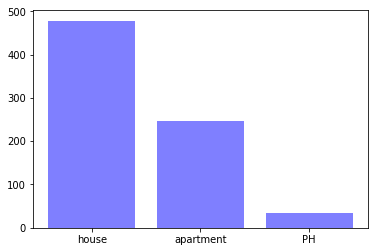

Bs.As. G.B.A. Zona Norte        267
Bs.As. G.B.A. Zona Oeste        155
Buenos Aires Costa Atlántica    103
Capital Federal                  69
Bs.As. G.B.A. Zona Sur           65
Córdoba                          47
Santa Fe                         43
Buenos Aires Interior            10
Name: state_name, dtype: int64


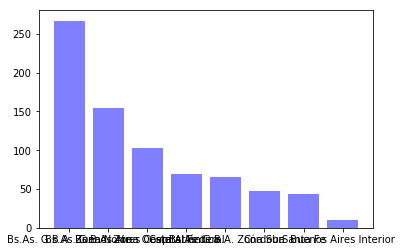

In [131]:
categories = ['property_type', 'state_name']

for category in categories:
    print(dfspm2[category].value_counts())
    plt.bar(dfspm2[category].value_counts().index, dfspm2[category].value_counts().values,color='b',\
            alpha=0.5)
    plt.show()

In [132]:
df.shape

(75650, 34)

In [133]:
df = df.loc[((df['surface_total_in_m2']) >= (df['surface_covered_in_m2'])) | (df['surface_total_in_m2'].isnull())]

In [134]:
df.shape

(74891, 34)

In [135]:
ame=df.loc[:,'description'].str.contains(r'/(?:PILETA|PISCINA|PATIO|TERRAZA|JARDIN|PARRILLA|ASADOR)', flags=re.IGNORECASE).astype('float')
df['ame']=ame
cochera=df.loc[:,'description'].str.contains(r'/(?:COCHERA|COCH)', flags=re.IGNORECASE).astype('float')
df['cochera']=cochera

### 4.2. Elimino Variables No Relevantes.

In [136]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', '_bcerrado', 'q75', 'q25',
       'qinf', 'qsup', 'iqr', 'q75+iqr*1.5', 'q25-iqr*1.5', 'ratio_sup', 'ame',
       'cochera'],
      dtype='object')

In [137]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['operation'], axis=1)
df = df.drop(['country_name'], axis=1)
df = df.drop(['geonames_id'], axis=1)
df = df.drop(['lat-lon'], axis=1)
df = df.drop(['lat'], axis=1)
df = df.drop(['lon'], axis=1)
df = df.drop(['price'], axis=1)
df = df.drop(['currency'], axis=1)
df = df.drop(['price_aprox_local_currency'], axis=1)
df = df.drop(['price_aprox_usd'], axis=1)
df = df.drop(['price_usd_per_m2'], axis=1)
df = df.drop(['floor'], axis=1)
df = df.drop(['expenses'], axis=1)
df = df.drop(['properati_url'], axis=1)
df = df.drop(['description'], axis=1)
df = df.drop(['title'], axis=1)
df = df.drop(['image_thumbnail'], axis=1)
df = df.drop(['q75'], axis=1)
df = df.drop(['q25'], axis=1)
df = df.drop(['qinf'], axis=1)
df = df.drop(['qsup'], axis=1)
df = df.drop(['iqr'], axis=1)
df = df.drop(['q75+iqr*1.5'], axis=1)
df = df.drop(['q25-iqr*1.5'], axis=1)
df = df.drop(['_bcerrado'], axis=1)


In [138]:
df.shape

(74891, 10)

In [139]:
df.isnull().sum()

property_type                0
place_name                   0
state_name                   0
surface_total_in_m2          0
surface_covered_in_m2        0
price_per_m2                 0
rooms                    15701
ratio_sup                    0
ame                          0
cochera                      0
dtype: int64

In [140]:
df.columns

Index(['property_type', 'place_name', 'state_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_per_m2', 'rooms', 'ratio_sup', 'ame',
       'cochera'],
      dtype='object')

In [141]:
df.columns = ['tipo_propiedad','localidad','provincia','sup_total','sup_cubierta','precio_m2','ambientes','ratio_sup','amenities','cochera']

In [142]:
df.columns

Index(['tipo_propiedad', 'localidad', 'provincia', 'sup_total', 'sup_cubierta',
       'precio_m2', 'ambientes', 'ratio_sup', 'amenities', 'cochera'],
      dtype='object')

In [143]:
df.shape

(74891, 10)

In [144]:
df.sample(10)

,tipo_propiedad,localidad,provincia,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera
57613,apartment,Recoleta,Capital Federal,128.000000,120.0,2920,NaN,1.066667,0.0,0.0
52879,house,Manuel B Gonnet,Bs.As. G.B.A. Zona Sur,75.000000,75.0,1670,NaN,1.725348,0.0,0.0
18487,house,Mar del Plata,Buenos Aires Costa Atlántica,330.000000,120.0,1070,4,2.882974,0.0,0.0
26075,apartment,General Rodríguez,Bs.As. G.B.A. Zona Oeste,54.000000,50.0,2300,NaN,1.080000,0.0,0.0
71165,house,Tigre,Bs.As. G.B.A. Zona Norte,328.763145,179.0,1960,4,1.836666,0.0,0.0
69260,apartment,Villa Elvira,Bs.As. G.B.A. Zona Sur,82.000000,82.0,1250,NaN,1.000000,0.0,0.0
61352,PH,Florida,Bs.As. G.B.A. Zona Norte,140.000000,120.0,1650,4,1.158840,0.0,0.0
15023,house,Olivos,Bs.As. G.B.A. Zona Norte,158.000000,130.0,1920,5,1.235384,0.0,0.0
5250,apartment,Ramos Mejía,Bs.As. G.B.A. Zona Oeste,105.000000,105.0,2520,4,1.000000,0.0,0.0
70850,apartment,Colegiales,Capital Federal,68.000000,64.0,3720,2,1.062500,0.0,0.0


In [145]:
loc_dummies = pd.get_dummies(df.localidad, prefix=None, prefix_sep='_', drop_first=False)

In [146]:
loc_dummies

,los alamos,9 de Abril,Abasto,Acassuso,Achiras,Adrogué,Aeropuerto Internacional Ezeiza,Agronomía,Aguas Verdes,Aldo Bonzi,...,Villa del Parque,Villa del Totoral,Villars,Virasoro Village,Virrey del Pino,Virreyes,Wilde,William Morris,Zelaya,Zárate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
propiedad_dummies = pd.get_dummies(df.tipo_propiedad, prefix=None, prefix_sep='_', drop_first=False)

In [148]:
provincia_dummies = pd.get_dummies(df.provincia, prefix=None, prefix_sep='_', drop_first=False)

In [149]:
df2 = pd.concat([df, loc_dummies, provincia_dummies, propiedad_dummies], axis=1)

In [150]:
df2

,tipo_propiedad,localidad,provincia,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,...,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Buenos Aires Costa Atlántica,Buenos Aires Interior,Capital Federal,Córdoba,Santa Fe,PH,apartment,house
0,apartment,Mataderos,Capital Federal,55.000000,55.0,1310,2,1.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,apartment,Centro,Buenos Aires Costa Atlántica,35.000000,35.0,1830,2,1.000000,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,PH,Munro,Bs.As. G.B.A. Zona Norte,106.000000,78.0,1670,NaN,1.291275,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,apartment,Belgrano,Capital Federal,45.000000,40.0,3450,1,1.125000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,apartment,Belgrano,Capital Federal,65.000000,60.0,3250,NaN,1.083333,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5,apartment,Martínez,Bs.As. G.B.A. Zona Norte,39.000000,36.0,3190,2,1.083333,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,apartment,Palermo Soho,Capital Federal,50.000000,30.0,3720,1,1.666667,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
7,apartment,Palermo Soho,Capital Federal,42.000000,31.0,4770,1,1.354839,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
8,PH,Mataderos,Capital Federal,140.000000,98.0,2440,4,1.348473,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
10,house,Tigre,Bs.As. G.B.A. Zona Norte,270.000000,270.0,2110,NaN,1.836666,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [151]:
df2 = df2.drop(['tipo_propiedad'], axis=1)
df2 = df2.drop(['localidad'], axis=1)
df2 = df2.drop(['provincia'], axis=1)

In [152]:
df2.sample()

,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,los alamos,9 de Abril,Abasto,...,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Buenos Aires Costa Atlántica,Buenos Aires Interior,Capital Federal,Córdoba,Santa Fe,PH,apartment,house
5807,45.0,45.0,2590,1,1.0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [153]:
export_csv = df2.to_csv (r'df2.csv', index = None, header=True)

In [155]:
df2.shape

(74891, 538)

In [156]:
df2.isnull().sum()

sup_total                              0
sup_cubierta                           0
precio_m2                              0
ambientes                          15701
ratio_sup                              0
amenities                              0
cochera                                0
 los alamos                            0
9 de Abril                             0
Abasto                                 0
Acassuso                               0
Achiras                                0
Adrogué                                0
Aeropuerto Internacional Ezeiza        0
Agronomía                              0
Aguas Verdes                           0
Aldo Bonzi                             0
Alejandro Korn                         0
Almagro                                0
Almirante Brown                        0
Alta Gracia                            0
Altamira                               0
Alvear                                 0
Arequito                               0
Arroyo Seco     